In [769]:

kc = pd.read_csv('kc_house_data.csv')

In [812]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
%matplotlib inline

In [770]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [771]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [772]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Looking at each variable - initial changes made below

### Date

In [773]:
#change to datetime

In [774]:
kc['date'] = pd.to_datetime(kc['date'])

### Sqft_Basement

In [775]:
##replaced ? (434) with 0

In [776]:
kc['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
274.0         1
1960.0        1
2610.0        1
1913.0        1
2810.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [777]:
kc['sqft_basement'].replace({'?': 0}, inplace = True)

In [779]:
##changed to float and all values over 0 to 1 - if basement yes if not no

In [780]:
kc['sqft_basement'] = kc['sqft_basement'].astype(float)

In [781]:
kc['sqft_basement'].values[kc['sqft_basement'].values > 0] = 1

In [782]:
#change to category type

In [783]:
kc['sqft_basement'] = kc['sqft_basement'].astype('category')

In [784]:
kc['sqft_basement'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

### Waterfront View

In [785]:
# replaced NaN with 0 --> Binary (1,0) For view of waterfront

In [786]:
kc['waterfront'].fillna(0, inplace = True) 

In [787]:
#change to category variable

In [788]:
kc['waterfront'] = kc['waterfront'].astype('category')

In [789]:
kc['waterfront'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

### Grade

In [790]:
#Changed 3-13 Grade --> 0-10

In [791]:
kc['grade'] = kc['grade'].apply(lambda x: x -3)

In [836]:
kc['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

### View (Tour Rating)

In [793]:
#Scaled 0 - 4 (0 no tour, 1 bad tour ... 4 excellent tour)

In [794]:
kc['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [833]:
kc['view'].isnull().sum()

0

In [834]:
kc['view'].fillna(0, inplace = True) 

In [835]:
kc['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

## Year Built 

##### Change Year Built to 'How Old'

In [853]:
kc['yr_built'] = kc['yr_built'].apply(lambda x: 2015-x)

In [854]:
kc['yr_built'].describe()

count    21597.000000
mean        44.000324
std         29.375234
min          0.000000
25%         18.000000
50%         40.000000
75%         64.000000
max        115.000000
Name: yr_built, dtype: float64

# Renaming Columns

In [857]:
kc.rename(columns={'view': 'Tour_Rating', 'grade': 'Assoc_Rating', 'yr_built': 'Age'}, inplace=True)

# Initial Dropping Columns
* id - irrelevant index
* yr_renovated - Missing 3.5k data points and 17k equals zero and cannot 
* sqft_above - have total sqft living and yes or no basement

In [943]:
kc.drop(['yr_renovated','id'], axis=1, inplace = True)

KeyError: "['yr_renovated' 'id'] not found in axis"

In [944]:
kc.drop(['sqft_above'], axis=1, inplace = True)

# Saving as csv

In [980]:
kc.to_csv('KC_Initial_Clean.csv')

### Looking at Correlation - Multicollinearity 

In [1111]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 90 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
Tour_Rating      21597 non-null float64
condition        21597 non-null int64
Assoc_Rating     21597 non-null int64
sqft_basement    21597 non-null category
Age              21597 non-null int64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
98002            21597 non-null uint8
98003            21597 non-null uint8
98004            21597 non-null uint8
98005            21597 non-null uint8
98006            21597 no

In [ ]:
new_kc = kc['price','bathrooms', 'sqft_living','Assoc_rating',]

In [1108]:
abs(kc.corr()) > 0.5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Tour_Rating,condition,Assoc_Rating,Age,...,98166,98168,98177,98178,98188,98198,98199,logsqftliving,logbedrooms,pricelog
price,True,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
bedrooms,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
bathrooms,True,True,True,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True
sqft_living,True,True,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,True
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
98199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
logsqftliving,True,True,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,True
logbedrooms,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


# Identifying Categorical Variables

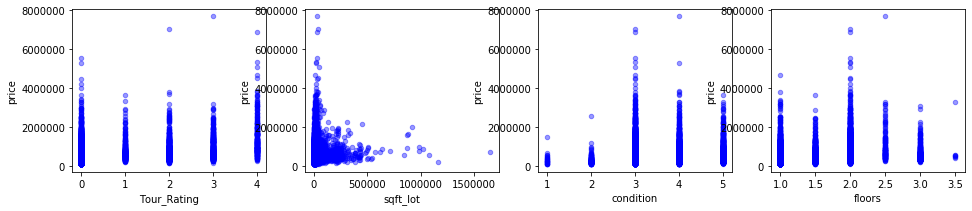

In [1100]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['Tour_Rating', 'sqft_lot', 'condition', 'floors'], axes):
    kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### Bathrooms and Sqft Living High Correlaction - Grade and Sqft living space high correlation 

In [831]:
#Polynomial regression, lasso regression, ridge regression

# Running Linear Regeression Model

In [848]:
kc.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [895]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'Tour_Rating', 'condition', 'Assoc_Rating',
       'sqft_above', 'sqft_basement', 'Age', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

*R^2 how much of the variance in target is accounted for by the variance.... the proportion of the total variance explained by the predictor variable---------->height and weight: r=.5, then r2 =.25 Height accounts for 25% of the variance in weight
*Intercept Coef - If x = 0(no variable) then y = intercept. Otherwise for every 1 change in x the y value changes by the slope 

In [1116]:
lr_model = ols(formula='pricelog~sqft_living+zipcode', data=kc).fit()  

In [1117]:
lr_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pricelog   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1429.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:08:55   Log-Likelihood:                 1899.5
No. Observations:               21597   AIC:                            -3657.
Df Residuals:                   21526   BIC:                            -3090.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.8370      0.012    971.131      0.000      11.813      11.861
zipcode[T.98002]    -0.0603      0.020     -3.075      0.002      -0.099      -0.022
zipcode[T.98003]     0.0381      0.018      2.154      0.031       0.003       0.073
zipcode[T.98004]     1.1691      0.017     68.040      0.000       1.135       1.203
zipcode[T.98005]     0.8075      0.021     38.869      0.000       0.767       0.848
zipcode[T.98006]     0.7301      0.015     47.264      0.000       0.700       0.760
zipcode[T.98007]     0.6973      0.022     31.625      0.000       0.654       0.741
zipcode[T.98008]     0.7061      0.018     40.057      0.000       0.672       0.741
zipcode[T.98010]     0.2779      0.025     11.076      0.000       0.229       0.327
zipcode[T.98011]     0.4608      0.020     23.346      0.000       0.422       0.499
zipcode[T.98014]     0.3311      0.023     14.327      0.000       0.286       0.376
zipcode[T.98019]     0.3293      0.020     16.548      0.000       0.290       0.368
zipcode[T.98022]     0.1344      0.019      7.205      0.000       0.098       0.171
zipcode[T.98023]    -0.0103      0.015     -0.673      0.501      -0.040       0.020
zipcode[T.98024]     0.4754      0.027     17.323      0.000       0.422       0.529
zipcode[T.98027]     0.5489      0.016     34.219      0.000       0.517       0.580
zipcode[T.98028]     0.4311      0.018     24.457      0.000       0.397       0.466
zipcode[T.98029]     0.6549      0.017     38.428      0.000       0.621       0.688
zipcode[T.98030]     0.0554      0.018      3.054      0.002       0.020       0.091
zipcode[T.98031]     0.0824      0.018      4.628      0.000       0.048       0.117
zipcode[T.98032]    -0.0378      0.023     -1.641      0.101      -0.083       0.007
zipcode[T.98033]     0.8284      0.016     52.261      0.000       0.797       0.859
zipcode[T.98034]     0.5574      0.015     37.002      0.000       0.528       0.587
zipcode[T.98038]     0.1836      0.015     12.372      0.000       0.155       0.213
zipcode[T.98039]     1.3234      0.034     39.301      0.000       1.257       1.389
zipcode[T.98040]     0.9953      0.018     55.987      0.000       0.960       1.030
zipcode[T.98042]     0.0782      0.015      5.195      0.000       0.049       0.108
zipcode[T.98045]     0.3649      0.019     19.220      0.000       0.328       0.402
zipcode[T.98052]     0.6837      0.015     45.785      0.000       0.654       0.713
zipcode[T.98053]     0.6178      0.016     38.283      0.000       0.586       0.649
zipcode[T.98055]     0.1271      0.018      7.099      0.000       0.092       0.162
zipcode[T.98056]     0.3258      0.016     20.287      0.000       0.294       0.357
zipcode[T.98058]     0.1795      0.016     11.470      0.000       0.149       0.210
zipcode[T.98059]     0.

# Zipcode Dummies

In [951]:
kc['zipcode'] = kc['zipcode'].astype('category')

In [952]:
zipdums = pd.get_dummies(kc['zipcode'], drop_first=True)

In [953]:
kc = pd.concat([kc, zipdums], axis = 1)

In [1118]:
kc['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

# Log Transformation

* More normal distributions

In [ ]:
non_normal = ['column', 'column', 'column']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

# Feature Scaling and Normalization

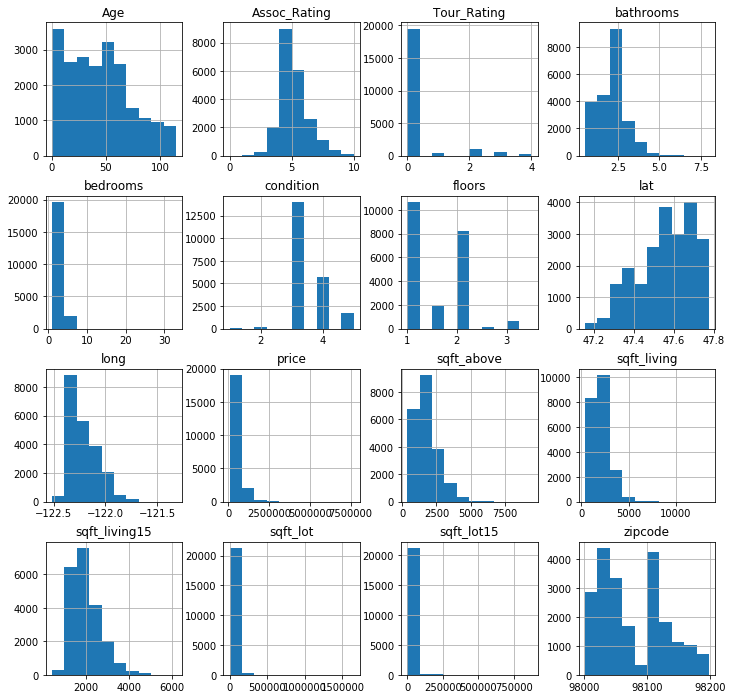

In [870]:
kc.hist(figsize  = [12, 12]); 

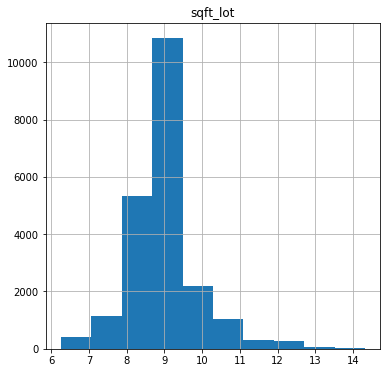

In [1102]:
data_log = pd.DataFrame([])
# kc['logbedrooms'] = np.log(kc['bedrooms'])
# data_log['logbathrooms'] = np.log(kc['bathrooms'])
kc['pricelog'] = np.log(kc['price'])
data_log['sqft_lot'] = np.log(kc['sqft_lot'])

data_log.hist(figsize  = [6, 6]);

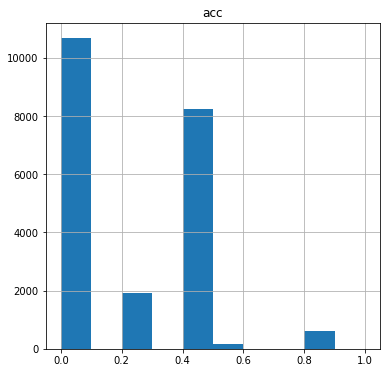

In [1011]:
floor = kc['floors']
scaled_floor = (floor - min(floor)) / (max(floor) - min(floor))

data_scaled = pd.DataFrame([])

data_scaled['acc'] = scaled_floor

data_scaled.hist(figsize = [6, 6]);


In [ ]:
acc = data_pred['acceleration']
# logdisp = data_log['logdisp']
# loghorse = data_log['loghorse']
# logweight = data_log['logweight']

scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
# scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
# scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['acc'] = scaled_acc
data_cont_scaled['disp'] = scaled_disp
# data_cont_scaled['horse'] = scaled_horse
# data_cont_scaled['weight'] = scaled_weight

data_cont_scaled.hist(figsize = [6, 6]);

In [1044]:
kc.columns

Index([         'date',         'price',      'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
         'Tour_Rating',     'condition',  'Assoc_Rating', 'sqft_basement',
                 'Age',       'zipcode',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,           98058,           98059,           98065,
                 98070,  

# SqftLot, SqftLiving, Sqft15

In [721]:
kc['sqft_lot15'].describe

<bound method NDFrame.describe of 0        5650
1        7639
2        8062
3        5000
4        7503
         ... 
21592    1509
21593    7200
21594    2007
21595    1287
21596    1357
Name: sqft_lot15, Length: 21597, dtype: int64>

#### Creating new Add_Size that will determine living space size relative to neighborhood (15 nieghbors)

In [723]:
def add_size(kc):
    Size = []
    lower_size = kc['sqft_living'] - 1000
    raise_size = kc['sqft_living'] + 1000
    if lower_size >= kc['sqft_living15']:
        Size.append('Big House')
    elif raise_size <= kc['sqft_living15']:
        Size.append('Small House')
    else:
        Size.append('Average House')
    return Size

    

In [725]:
x = kc.apply(add_size, axis = 1)

In [726]:
kc['LivingSpaceNeighbors'] = tuple(x)

In [753]:
def add_size_property(kc):
    Size = []
    lower_size = kc['sqft_lot'] - 5000
    raise_size = kc['sqft_lot'] + 5000
    if lower_size >= kc['sqft_lot15']:
        Size.append('Larger_Neighborhood_Property')
    elif raise_size <= kc['sqft_lot15']:
        Size.append('Smaller_Neighborhood_Property')
    else:
        Size.append('Average_Property')
    return Size

    

In [738]:
p = kc.apply(add_size_property, axis = 1)

In [739]:
kc['Property_Space'] = tuple(p)

##### Getting Dummy Variables 

In [727]:
kc['LivingSpaceNeighbors'] = kc['LivingSpaceNeighbors'].astype('category')

In [740]:
kc['Property_Space'] = kc['Property_Space'].astype('category')

In [731]:
dums = pd.get_dummies(kc['LivingSpaceNeighbors'], drop_first=True)

In [742]:
dums2 = pd.get_dummies(kc['Property_Space'], drop_first=True)

In [732]:
kc = pd.concat([kc, dums], axis = 1)

In [743]:
kc = pd.concat([kc, dums2], axis = 1)

In [982]:
kc

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,Tour_Rating,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


# Reason for dropping 

* sqft_living15
* sqft_lot15


In [761]:
kc.drop(['yr_renovated','id','sqft_above','sqft_living15','sqft_lot15'], axis=1, inplace = True)

## Renaming Columns

In [ ]:
#kc.rename(columns={'time': 'Date', 'icon': "Forecast"}, inplace=True)

In [411]:
#linear regression models --> lasso --> ridge - learn (regularzation lecture for training data)

In [ ]:
#dummy variable for  